# 实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [3]:
X = X[y<2,:2]
y = y[y<2]

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

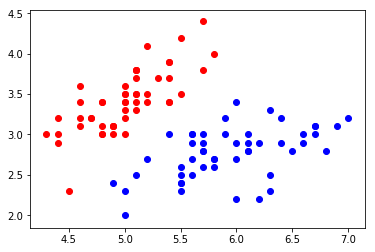

In [6]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

### 使用逻辑回归

In [7]:
%run LogisticRegression.py

In [8]:
%run ../util/model_selection.py

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [11]:
log_reg.score(X_test, y_test)

1.0

In [12]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [13]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [14]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [15]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [16]:
log_reg.intercept_

-0.6937719272911228

# 决策边界

$$\hat{p }= \sigma(\theta^T \cdot x_b) = \frac{1}{1 + e^{-\theta^T \cdot x_b}}$$

$$\hat{y} = \begin{cases}
1,\quad \hat{p} \geq 0.5 \quad \theta^T \cdot x_b \geq 0\\\\
0,\quad \hat{p} < 0.5 \quad \theta^T \cdot x_b < 0
\end{cases}$$

此时$\theta^T \cdot x_b = 0$为决策边界

如果X有两个特征，可以写作$\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$ 

或者写作

$$x_2 = \frac{-\theta_0 - \theta_1x_1}{\theta_2}$$

可以表达为一条实线

In [17]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [18]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

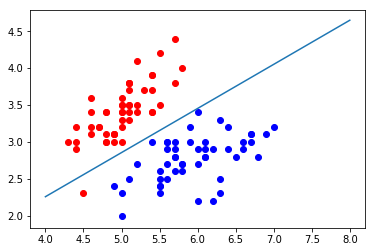

In [19]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

这根线就是我们说的决策边界

### 绘制不规则的决策边界

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100 )).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100 )).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    custom_camp = ListedColormap(['#EF9A9A', '#FFF59F', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_camp)

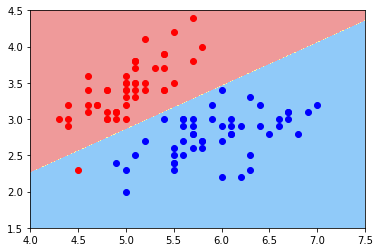

In [21]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

### kNN 的决策边界

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
knn_clf.score(X_test, y_test)

1.0

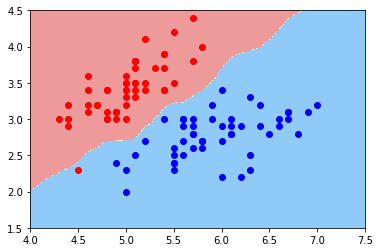

In [24]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

In [25]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

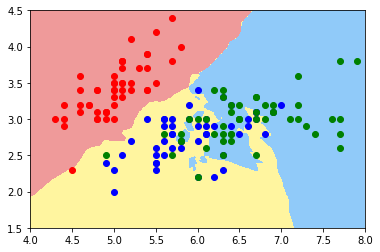

In [26]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1], color="red")
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1], color="blue")
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1], color="green")
plt.show()

In [27]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

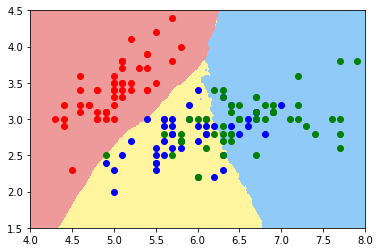

In [28]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1], color="red")
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1], color="blue")
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1], color="green")
plt.show()